

# Project:  TMDb movies Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this project we will be analyzing TMDb data related to films. As we know, TMDb is a well known community built and online database that includes information about cast, production crew and personal biographies, plot summaries, trivia, ratings, etc.

>TMDb web page: https://www.themoviedb.org/

> To download the data set: https://s3.amazonaws.com/video.udacity-data.com/topher/2018/July/5b57919a_data-set-options/data-set-options.pdf

In [1]:
# We will use this cell to set up import statements for all of the packages that we need

import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

> In this section of the report we will load the data, check for cleanliness, and then trim and clean the dataset if it's necessary for proper analysis. 

### General Properties

> First, let's load the data and check the general properties of the dataset.

In [2]:
# Let's load the data and print out a few lines. 

df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.shape

(10866, 21)

> There are 21 columns and 10866 rows of information in this data set. 

> The names of the columns are in lowercase and no spaces in between


In [4]:
# Let's perform some operations to inspect data types and look for instances of missing or possibly errant data.

df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


> We can see that there are some 0 values for 'budget', 'revenue' and 'runtime' that probably means that they didn't record the real values.

>There is a movie with a runtime of 900 minutes.

In [5]:
# Let's check if the data types are in order.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [6]:
#Let's check if there is any null data

df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

>There are some null values in 'imdb_id', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'genres'and 'production_companies'

> We can see that 'release_year' should be a date, but we can use the column 'realese_year' for our analysis.

> We can observe that the columns 'budget' and 'revenue' are integers but the 'budget_adj' and 'revenue_adj' are floats. That's because they are adjusted in terms of 2010 dollars, accounting for inflation over time, so we can use the adjusted columns to compare budgets and revenues from different years.



In [7]:
# Let's check for duplicated data

df.duplicated().sum()

1

> There is 1 row of duplicated data.

In [8]:
# Let's check how many unique values are for each column.

df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

### Question that can be answer: 

>Which movie had the highest and lowest budget?

>Which movie had the highest and lowest revenue?

>Which movie had the highest and lowest runtime, and which is the mean runtime?

>Which movie had the highest and lowest vote average?

>Which is the most popular genre?

>Which is the most popular cast member?

### Cleaning that needs to be performed:

>1) Remove the columns 'id', 'popularity','homepage', 'keywords','tagline', 'overview', 'release_date'.

>2) Delete the duplicated row.

>3) Delete the rows that have 0 values for 'budget', 'revenue' and 'runtime', and the row with the 900 min for 'runtime'

>4) Delete null values that remains in the dataset.



### Data Cleaning 

>In this section we will clean the data following the steps we discussed before.


In [9]:
# Remove the columns that we don't need 
df.drop(['id', 'popularity','homepage', 'keywords','tagline', 'overview', 'release_date'], axis=1, inplace=True)
# Let's see if the drop worked 
df.head()

,imdb_id,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,tt0369610,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09
1,tt1392190,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08
2,tt2908446,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08
3,tt2488496,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1.839999e+08,1.902723e+09
4,tt2820852,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1.747999e+08,1.385749e+09


In [10]:
# Now we will drop the duplicated row
df.drop_duplicates(inplace=True)
df.shape

(10865, 14)

In [11]:
# Replace 0 with NAN values so we can drop them
col = ['budget', 'revenue', 'runtime']
df[col] = df[col].replace(0, np.NaN)
# Drop the NAN values
df.dropna(subset = col, inplace = True)
df.describe()



,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3.854000e+03,3.854000e+03,3854.000000,3854.000000,3854.000000,3854.000000,3.854000e+03,3.854000e+03
mean,3.720370e+07,1.076866e+08,109.220291,527.720291,6.168163,2001.261028,4.423999e+07,1.370647e+08
std,4.220822e+07,1.765393e+08,19.922820,879.956821,0.794920,11.282575,4.480925e+07,2.161114e+08
min,1.000000e+00,2.000000e+00,15.000000,10.000000,2.200000,1960.000000,9.693980e-01,2.370705e+00
25%,1.000000e+07,1.360003e+07,95.000000,71.000000,5.700000,1995.000000,1.309053e+07,1.835735e+07
50%,2.400000e+07,4.480000e+07,106.000000,204.000000,6.200000,2004.000000,3.001611e+07,6.173068e+07
75%,5.000000e+07,1.242125e+08,119.000000,580.000000,6.700000,2010.000000,6.061307e+07,1.632577e+08
max,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


In [12]:
df.shape

(3854, 14)

In [13]:
# We will drop the null rows from the data if there's any left
df.dropna(inplace=True)
df.shape

(3805, 14)

<a id='eda'></a>
## Exploratory Data Analysis

> In this section we will compute statistics and create visualizations to help answer the questions.

### Research Question 1: Which movie had the highest and lowest budget?

In [14]:
# Describe the data
df['budget_adj'].describe()

count    3.805000e+03
mean     4.471977e+07
std      4.488697e+07
min      9.693980e-01
25%      1.354637e+07
50%      3.038360e+07
75%      6.084153e+07
max      4.250000e+08
Name: budget_adj, dtype: float64

In [15]:
#Select the movie with the maximum budget from the budget_adj
df.loc[df['budget_adj'].idxmax()]

imdb_id                                                         tt1032751
budget                                                           4.25e+08
revenue                                                       1.10876e+07
original_title                                          The Warrior's Way
cast                    Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director                                                       Sngmoo Lee
runtime                                                               100
genres                          Adventure|Fantasy|Action|Western|Thriller
production_companies                             Boram Entertainment Inc.
vote_count                                                             74
vote_average                                                          6.4
release_year                                                         2010
budget_adj                                                       4.25e+08
revenue_adj                           

> The movie that had the highest budget was 'The Warrior's Way', lunched in 2010 with a budget of $42 million.

In [16]:
#Select the movie with the minimum budget from the budget_adj
df.loc[df['budget_adj'].idxmin()]

imdb_id                                                         tt1436559
budget                                                                  1
revenue                                                              1378
original_title                                    Love, Wedding, Marriage
cast                    Mandy Moore|Kellan Lutz|Jessica Szohr|Autumn F...
director                                                  Dermot Mulroney
runtime                                                                90
genres                                                     Comedy|Romance
production_companies    120dB Films|Scion Films|Voodoo Production Serv...
vote_count                                                             55
vote_average                                                          5.3
release_year                                                         2011
budget_adj                                                       0.969398
revenue_adj                           

> The movie that had the lowest budget was 'Love, Wedding, Marriage', lunched in 2011 with a budget of $1 million.

### Research Question 2: Which movie had the highest and lowest revenue?

In [17]:
# Describe the data
df['revenue_adj'].describe()

count    3.805000e+03
mean     1.387159e+08
std      2.169973e+08
min      2.370705e+00
25%      1.925371e+07
50%      6.284688e+07
75%      1.658054e+08
max      2.827124e+09
Name: revenue_adj, dtype: float64

In [18]:
#Select the movie with the maximum revenue from the revenue_adj
df.loc[df['revenue_adj'].idxmax()]

imdb_id                                                         tt0499549
budget                                                           2.37e+08
revenue                                                       2.78151e+09
original_title                                                     Avatar
cast                    Sam Worthington|Zoe Saldana|Sigourney Weaver|S...
director                                                    James Cameron
runtime                                                               162
genres                           Action|Adventure|Fantasy|Science Fiction
production_companies    Ingenious Film Partners|Twentieth Century Fox ...
vote_count                                                           8458
vote_average                                                          7.1
release_year                                                         2009
budget_adj                                                    2.40887e+08
revenue_adj                           

> The movie that had the highest revenue was 'Avatar', lunched in 2009 with a revenue of $2.7 billion.

In [19]:
#Select the movie with the minimum revenue from the revenue_adj
df.loc[df['revenue_adj'].idxmin()]

imdb_id                                                         tt0323944
budget                                                              6e+06
revenue                                                                 2
original_title                                            Shattered Glass
cast                    Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...
director                                                        Billy Ray
runtime                                                                94
genres                                                      Drama|History
production_companies    Lions Gate Films|Cruise/Wagner Productions|Bau...
vote_count                                                             46
vote_average                                                          6.4
release_year                                                         2003
budget_adj                                                    7.11212e+06
revenue_adj                           

>The movie that had the lowest revenue was 'Shattered Glass', lunched in 2003 with a revenue of $2.

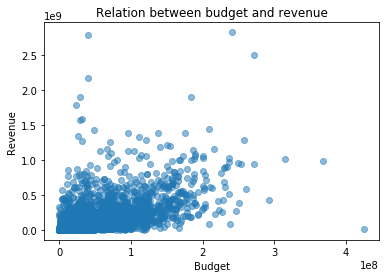

In [20]:
#Let's see if there's any relation between budget and revenue

# Title 
plt.title('Relation between budget and revenue')
# Name the x-axis
plt.xlabel('Budget')
# Name the y-axis
plt.ylabel('Revenue')

plt.scatter(df['budget_adj'], df['revenue_adj'], alpha=0.5)
plt.show()

In [21]:
#correlación con método pearson
df.corr(method ='pearson') 

,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
budget,1.000000,0.687059,0.259562,0.554689,0.022945,0.271915,0.958235,0.530941
revenue,0.687059,1.000000,0.249178,0.753574,0.228051,0.141317,0.655872,0.900449
runtime,0.259562,0.249178,1.000000,0.273464,0.359173,-0.113488,0.333453,0.279733
vote_count,0.554689,0.753574,0.273464,1.000000,0.389853,0.209688,0.495209,0.653202
vote_average,0.022945,0.228051,0.359173,0.389853,1.000000,-0.135646,0.035798,0.268227
release_year,0.271915,0.141317,-0.113488,0.209688,-0.135646,1.000000,0.078378,-0.101931
budget_adj,0.958235,0.655872,0.333453,0.495209,0.035798,0.078378,1.000000,0.567983
revenue_adj,0.530941,0.900449,0.279733,0.653202,0.268227,-0.101931,0.567983,1.000000


In [22]:
#correlación con método kendall
df.corr(method ='kendall')

,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
budget,1.000000,0.486658,0.196169,0.354909,-0.041971,0.157652,0.834499,0.416835
revenue,0.486658,1.000000,0.173685,0.540418,0.133446,0.055634,0.484026,0.864619
runtime,0.196169,0.173685,1.000000,0.143596,0.254691,-0.030855,0.235558,0.192371
vote_count,0.354909,0.540418,0.143596,1.000000,0.270571,0.222355,0.309665,0.480811
vote_average,-0.041971,0.133446,0.254691,0.270571,1.000000,-0.064157,-0.007567,0.165913
release_year,0.157652,0.055634,-0.030855,0.222355,-0.064157,1.000000,-0.017984,-0.081965
budget_adj,0.834499,0.484026,0.235558,0.309665,-0.007567,-0.017984,1.000000,0.471556
revenue_adj,0.416835,0.864619,0.192371,0.480811,0.165913,-0.081965,0.471556,1.000000


> We can observe that the correlation is not that clear, we have movies with low budgets and high revenues but also movies with high budgets and low revenues. Nevertheless, it seems like a possitive correlation.

### Research Question 3: Which movie had the highest and lowest runtime, and which is the mean runtime?

In [23]:
#Select the movie with the maximum runtime
df.loc[df['runtime'].idxmax()]

imdb_id                                                         tt1321865
budget                                                            1.8e+07
revenue                                                            871279
original_title                                                     Carlos
cast                    Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...
director                                                  Olivier Assayas
runtime                                                               338
genres                                       Crime|Drama|Thriller|History
production_companies    Egoli Tossell Film AG|Canal+|Arte France|Films...
vote_count                                                             35
vote_average                                                          6.2
release_year                                                         2010
budget_adj                                                        1.8e+07
revenue_adj                           

> The movie with the highest runtime was 'Carlos', directed by Oliver Assayas with a runtime of 338 minutes.

In [24]:
#Select the movie with the minimum runtime
df.loc[df['runtime'].idxmin()]

imdb_id                                                         tt0368574
budget                                                                 10
revenue                                                                 5
original_title                                                Kid's Story
cast                    Clayton Watson|Keanu Reeves|Carrie-Anne Moss|K...
director                                              Shinichiro Watanabe
runtime                                                                15
genres                                          Science Fiction|Animation
production_companies                                          Studio 4Â°C
vote_count                                                             16
vote_average                                                          6.8
release_year                                                         2003
budget_adj                                                        11.8535
revenue_adj                           

>The movie with the lowest runtime was 'Kid's Story', directed by Shinichiro Watanabe with a runtime of 15 minutes.

In [25]:
#Select the mean for runtime
df['runtime'].mean()

109.35111695137977

> The mean runtime was 109.35 minutes


In [26]:
df['runtime'].describe()

count    3805.000000
mean      109.351117
std        19.845678
min        15.000000
25%        96.000000
50%       106.000000
75%       119.000000
max       338.000000
Name: runtime, dtype: float64

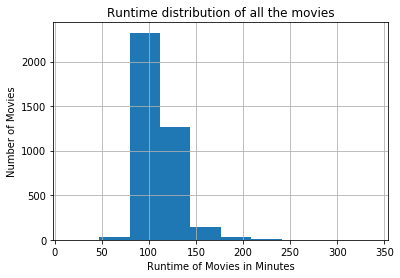

In [27]:
# Let's plot the runtimes of all the movies to observe the distribution

# Title of the histogram
plt.title('Runtime distribution of all the movies')
# Name the x-axis
plt.xlabel('Runtime of Movies in Minutes')
# Name the y-axis
plt.ylabel('Number of Movies')

# Plot the histogram
df['runtime'].hist()

> Most of the movies are in the range of 80 minutes to 110 minutes.

### Research Question 4: Which movie had the highest and lowest vote average?

In [28]:
#Select the movie with the maximum vote average
df.loc[df['vote_average'].idxmax()]

imdb_id                                                         tt0111161
budget                                                            2.5e+07
revenue                                                       2.83415e+07
original_title                                   The Shawshank Redemption
cast                    Tim Robbins|Morgan Freeman|Bob Gunton|William ...
director                                                   Frank Darabont
runtime                                                               142
genres                                                        Drama|Crime
production_companies                            Castle Rock Entertainment
vote_count                                                           5754
vote_average                                                          8.4
release_year                                                         1994
budget_adj                                                    3.67778e+07
revenue_adj                           

>The movie with the highest vote average was 'The Shawshank Redemption', realeased in 1994 with an average of 8.4.

In [29]:
#Select the movie with the minimum vote average
df.loc[df['vote_average'].idxmin()]

imdb_id                                                         tt0249516
budget                                                            6.5e+07
revenue                                                             73706
original_title                                                 Foodfight!
cast                    Charlie Sheen|Wayne Brady|Hilary Duff|Eva Long...
director                                                Lawrence Kasanoff
runtime                                                                87
genres                                     Animation|Action|Comedy|Family
production_companies    Threshold Entertainment|Lions Gate Family Ente...
vote_count                                                             12
vote_average                                                          2.2
release_year                                                         2012
budget_adj                                                    6.17334e+07
revenue_adj                           

>The movie with the lowest vote average was 'Foodfight!', realeased in 2012 with an average of 2.2.

In [30]:
df['vote_average'].describe()

count    3805.000000
mean        6.170565
std         0.792437
min         2.200000
25%         5.700000
50%         6.200000
75%         6.700000
max         8.400000
Name: vote_average, dtype: float64

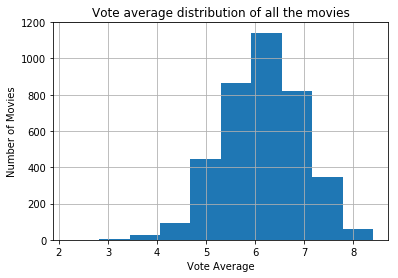

In [31]:
# Let's plot the vote averages of all the movies to observe the distribution

# Title of the histogram
plt.title('Vote average distribution of all the movies')
# Name the x-axis
plt.xlabel('Vote Average')
# Name the y-axis
plt.ylabel('Number of Movies')

# Plot the histogram
df['vote_average'].hist()

> It seems like the vote average follows a normal distribution. We will consider that popular movies have more than 6.7 points in vote_average.

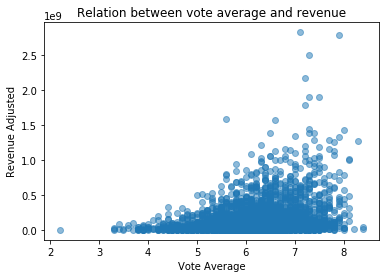

In [32]:
#Let's see if there's any relation between vote average and revenue

# Title
plt.title('Relation between vote average and revenue')
# Name the x-axis
plt.xlabel('Vote Average')
# Name the y-axis
plt.ylabel('Revenue Adjusted')

plt.scatter(df['vote_average'], df['revenue_adj'], alpha=0.5)
plt.show()

> We can see that the relation between vote average and revenue is positive. This makes sense, if the voters like the movie then they will recommend it to others and rice the revenue.

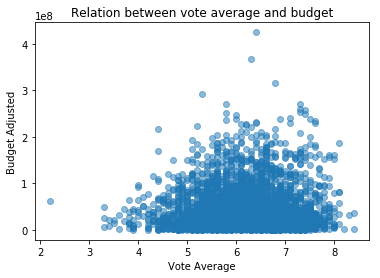

In [33]:
#Let's see if there's any relation between vote average and budget

# Title
plt.title('Relation between vote average and budget')
# Name the x-axis
plt.xlabel('Vote Average')
# Name the y-axis
plt.ylabel('Budget Adjusted')

plt.scatter(df['vote_average'], df['budget_adj'], alpha=0.5)
plt.show()

> We can see that the movies with the highest budgets are within the mean average vote

### Research Question 5: Which is the most popular genre?

In [34]:
# We will make a new Dataframe with the most popular movies
df_popular = df[df['vote_average'] >= 6.7]
# Reindexing the dataframe
df_popular.index = range(len(df_popular))


>For the following questions we will use the **df_popular** Dataframe that contains the data of the most popular movies. In order to do that, we gathered the information of movies with a **'vote_average'** greater or equal to 6.7.

In [35]:
#Let's separete the genres to quantify each one of them separetedly
genres_count = pd.Series(df_popular['genres'].str.cat(sep = '|').split('|')).value_counts(ascending = False)
genres_count.nunique()

19

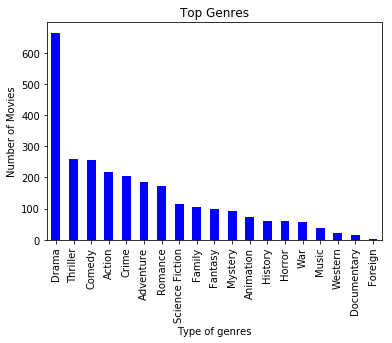

In [36]:
# Let's plot the count of the genres to visualize it.
genres = genres_count.plot.bar(color = 'b', fontsize = 10)

# Title
genres.set(title = 'Top Genres')
# Name the x-axis
genres.set_xlabel('Type of genres')
# Name the y-axis
genres.set_ylabel('Number of Movies')

plt.show()

> The most popular genre by far is Drama, followed by Thriller and Comedy.

### Research Question 6: Which is the most popular cast member?

In [37]:
#Let's separete the cast members to quantify each one of them separetedly
cast_count = pd.Series(df_popular['cast'].str.cat(sep = '|').split('|')).value_counts(ascending = False)
cast_count

Brad Pitt                 20
Robert De Niro            20
Tom Hanks                 17
Al Pacino                 15
Samuel L. Jackson         15
Dustin Hoffman            15
Meryl Streep              14
Johnny Depp               13
Leonardo DiCaprio         13
Harrison Ford             13
Ed Harris                 13
Willem Dafoe              12
Mark Ruffalo              12
Philip Seymour Hoffman    12
Gene Hackman              12
Ethan Hawke               12
Morgan Freeman            12
Denzel Washington         12
Cate Blanchett            12
Matt Damon                12
Julianne Moore            11
Robert Duvall             11
Ralph Fiennes             11
Robert Downey Jr.         11
John Goodman              11
Christian Bale            11
Kate Winslet              11
Tom Cruise                11
Sean Connery              11
Jake Gyllenhaal           10
                          ..
Darlene Cates              1
Krysten Ritter             1
Clarence Nash              1
Heida Reed    

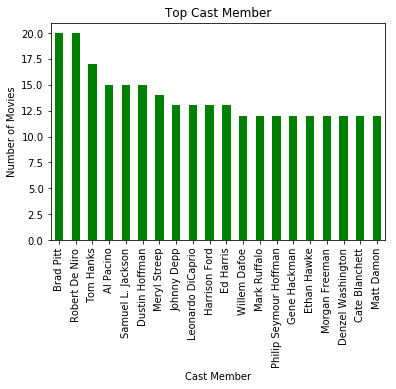

In [38]:
# Let's plot the count of the genres to visualize it.
cast = cast_count.head(20).plot.bar(color = 'g', fontsize = 10)

# Title
cast.set(title = 'Top Cast Member')
# Name the x-axis
cast.set_xlabel('Cast Member')
# Name the y-axis
cast.set_ylabel('Number of Movies')

plt.show()

> In order to attract costumers, is really important to choose your cast well. Here we can observe that Brad Pitt, Robert De Niro and Tom Hanks are the most popular actors.

<a id='conclusions'></a>
## Conclusions




>The TMDb movie dataset contains information of 10866 movies. After the data cleaning and wrangling, we dismissed the 0 values for the rows budget, revenue and runtime, and droped the duplicated and null values. 

>We used descriptive statistics and different plots to analyse and answer question like: Which movie had the highest and lowest budget, revenue, runtime and average vote? Which is the most popular genre and cast member?

>We observed that the relation between average vote and revenue is positive, and also that the movies with the highest budgets are within the mean average vote. The mean runtime was 109.35 minutes.

>We wanted to make further analysis on movies that had an average vote greater or equal to 6.7. It showed that the most popular genre in this type of movies are Drama, followed by Thriller and Comedy; and the most popular actors are Brad Pitt, Robert De Niro and Tom Hanks.


### Limitations:

>We had to remove many information in the cleaning data and wrangling process that could affect the results we found in this project. Also, not all the movies had the same amount of votes so the ones with fewer votes may be under or overrated.


In [39]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0